<a href="https://colab.research.google.com/github/PinakDivecha/1101608_1dconv_reg/blob/master/NLP_Assignemnt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imported the necessary libraries
import csv
import urllib.request as urllib2
# !pip install urllib2 
# import urllib2
import matplotlib.pyplot as plt

import pandas as pd
# Importing data using url
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
response = urllib2.urlopen(url)

# reading data using pandas and converting into dataframe
df = pd.read_csv(response)
# Removing the missing values
df = df.dropna()

In [92]:
# Question 1
# Displaying the first 10 rows/instances
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
import pandas as pd
from sklearn import preprocessing

x = df.loc[:,'longitude':'median_house_value'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)
df1.head(10)
# df.columns
df1.columns = [	'longitude',	'latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income'	,'median_house_value']

In [0]:
df1.head(10)
df = df1.copy()

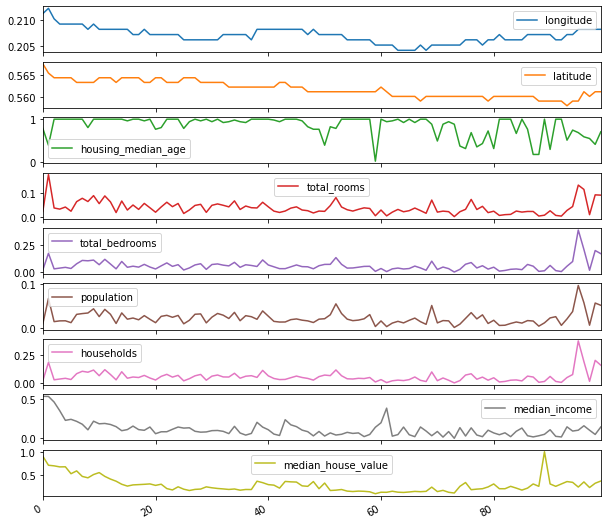

In [95]:
# Displaying the graph of all the attributes/columns. 
# First 100 Instances
df[:][:100].plot(subplots=True, figsize=(10, 10));

In [0]:
# # Converting the categorical into numerical
# df['ocean_proximity'] = df['ocean_proximity'].astype('category')

# # Save the numerical value for ocean_proximity column into new column name ocean_proximity_cat
# df["ocean_proximity_cat"] = df["ocean_proximity"].cat.codes

# # Importing the required library

# # For loop for displaying each column graph.
# for i in df.columns:
#     if i != 'ocean_proximity': 
#       plt.figure()
#       plt.suptitle('Figure for column - '+i)
#       df[i][:100].plot(subplots=True)
# # Question 2 output

In [0]:
# Importing the Required Library
import torch
from torch.nn import Conv1d
from torch.nn import Dropout

from torch.nn import MaxPool1d
from torch.nn import AvgPool1d


from torch.nn import  Flatten

from torch.nn import Linear

from torch.nn.functional import relu

from torch.utils.data import DataLoader, TensorDataset

In [0]:
# Creating CNN model using pytorch
class CnnRegressor(torch.nn.Module):
  # Contructor
  def __init__(self, batch_size, inputs, outputs):

    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs = outputs
    
    # First Convolution layer
    self.input_layer  = Conv1d(inputs, batch_size, 1)

    # First Max Pooling
    self.max_pooling_layer = MaxPool1d(1)
    # self.max_pooling_layer = AvgPool1d(1)
      
    # Second Convolution Layer
    self.conv_layer = Conv1d(batch_size, 128,1) 
    
    # Flatten Layer
    self.flatten_layer = Flatten()

    # Linear Layer 1
    self.linear_layer = Linear(128, 64)

    # Linear layer 2
    self.output_layer = Linear(64, outputs)

  # This function connects the layers defined in contructor 
  def feed(self,input):
    # First the input is reshpaed as per the required size
    input = input.reshape((self.batch_size, self.inputs, 1))
  
    # Goes into the conv layer and its output is put into relu funtion
    output = relu(self.input_layer(input))

    # And max pooling is applied
    output = self.max_pooling_layer(output)

    # Similar step is done conv 2
    output = relu(self.conv_layer(output))

    # Flattern the value
    output = self.flatten_layer(output)
  

    output = self.linear_layer(output)

    output = self.output_layer(output)

    return output


# Below comments were used by me in order to overcome overfitting
    # self.max_pooling_layer1 = MaxPool1d(1)
    # self.max_pooling_layer1 = AvgPool1d(1)
    
    # self.conv_layer1 = Conv1d(128, 128,1) #Conv1D

    # self.max_pooling_layer2 = MaxPool1d(1)

    # self.conv_layer2 = Conv1d(128, 128,1) #Conv1D

    # self.max_pooling_layer3 = MaxPool1d(1)

    # self.conv_layer3 = Conv1d(128, 128,1) #Conv1D

    # print("One ", output.shape)
    # output = self.max_pooling_layer1(output)
    # print("two ",output.shape)
    # output = relu(self.conv_layer1(output))

    # output = self.max_pooling_layer2(output)
    # # print("two ",output.shape)
    # output = relu(self.conv_layer2(output))

    # output = self.max_pooling_layer3(output)
    # # print("two ",output.shape)
    # output = relu(self.conv_layer3(output))

In [0]:
# Importing necessary library
import pandas as pd
from sklearn.model_selection import train_test_split
    
import numpy as np

In [100]:
# Reading the attributes
df_x = df.loc[:,'longitude':'median_income']
# Seperating target variable
df_y = df['median_house_value']


# Spliting the dataset as per 30:70 ratio
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.3, random_state=2003)

# Converting into numpy 
x_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

x_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# Displaying the dimention of the arrays
print(x_train_np.shape, y_train_np.shape, 
      x_test_np.shape, y_test_np.shape)

(14303, 8) (14303,) (6130, 8) (6130,)


In [101]:
# Defining the batch size
batch_size = 64

model = CnnRegressor(batch_size, df_x.shape[1],1)
# As I am using gpu 
model.cuda()

CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (linear_layer): Linear(in_features=128, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [102]:
from torch.optim import SGD
from torch.optim import Rprop, Adam


from torch.nn import L1Loss, MSELoss
# from torch.nn import L1Loss
!pip install pytorch.ignite

from ignite.contrib.metrics.regression.r2_score import R2Score

  Using cached https://files.pythonhosted.org/packages/35/55/41e8a995876fd2ade29bdba0c3efefa38e7d605cb353c70f3173c04928b5/pytorch_ignite-0.3.0-py2.py3-none-any.whl


In [0]:
def model_loss(model, dataa, train = False, optimizer = None):
  performance = L1Loss()
  # performance = MSELoss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataa):
    # print("This is the shape ",input.shape)
    prediction = model.feed(input)

    loss = performance(prediction, output)

    score_metric.update([prediction, output])
    score = score_metric.compute()

    if (train):
      optimizer.zero_grad()

      loss.backward()

      optimizer.step()

    avg_loss += loss.item()
    avg_score += score
    count += 1
 
  return avg_loss / count, avg_score / count

In [104]:
# Defining epoch
epochs = 500 

# Defining optimizer
optimizer = Adam(model.parameters(),lr=0.001)

# Converting numpy array into required format for torch
inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle = True, drop_last = True)
xx = 0
yy = 0

# Calculating the time
import time
start = time.time()

for epoch in range(epochs):
  avg_loss, avg_2_score = model_loss(model, loader, train = True, optimizer = optimizer)

end = time.time()
print("Time taken to create a model",str(end - start))

print("Epoch ",str(epoch+1)," Loss", str(avg_loss), " R2Score",str(avg_2_score))


Time taken to create a model 380.0281352996826
Epoch  500  Loss 0.060570561063931126  R2Score 0.8305019572911332


In [105]:
# Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Saving the code in the drive
torch.save(model.state_dict(),
           '/content/drive/My Drive/1101608_1dconv_reg.h')

In [110]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().float()

tensor = TensorDataset(inputs, outputs)

loader = DataLoader(tensor,batch_size, shuffle=True, drop_last=True)

# Calculating the time #Inference Time
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

# Start of time
start.record()
avg_loss, avg_r2_score = model_loss(model, loader)
end.record()
# End of time
torch.cuda.synchronize()

print("Inference time: ",str(start.elapsed_time(end)))

print("Loss = " + str(avg_loss) + "\nR^2 Score = " + str(avg_r2_score))


Inference time:  125.24441528320312
Loss = 0.06773636458735717
R^2 Score = 0.7933584797075979
